# Playing with simulated correlated data #
Make a data set of nConditions-dimensional points of expression in one of nNetworks correlated sets. The total number of data points is nSamples \* nConditions \* nNetworks

In [1]:
import random as rn
import math
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
nConditions=20
nNetworks=5
nSamples=100

In [3]:
vec=[]
for j in range(nNetworks):
    vec.append([])
    for i in range(nConditions):
        vec[j].append(rn.random())
data=[]
network=[]
for i in range(nSamples):
    for j in range(nNetworks):
        tvec = vec[j].copy()
        factor = 10*rn.random()
        for k in range(nConditions):
            tvec[j] *= factor
        data.append(tvec)
        network.append(j)

In [4]:
pca = PCA(n_components=2)

In [5]:
for i,vec in enumerate(data):
    for j,d in enumerate(vec):
        vec[j] = math.log2(d)

In [6]:
logcomponents = pca.fit(np.array(data)).components_

In [7]:
logdots = np.matmul(logcomponents,np.transpose(np.float64(data)))

In [8]:
np.array(network).shape

(500,)

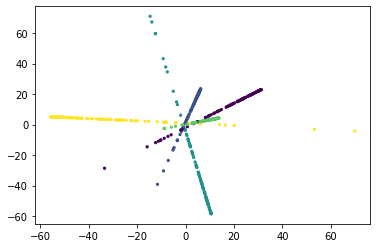

In [9]:
plt.scatter(logdots[0,:],logdots[1,:],s=5,c=np.array(network))
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [10]:
slopVec = []
intVec = []
for i in range(0,logdots.shape[1]):
    slpsum = 0
    intsum = 0
    wghtsum = 0
    for j in range(0,logdots.shape[1]):
        if i!=j:
            weight = np.sum(np.square(logdots[:,i]-logdots[:,j]))
            slope = (logdots[1,i]-logdots[1,j])/(logdots[0,i]-logdots[0,j])
            intercept = (logdots[0,i]*logdots[1,j]-logdots[1,i]*logdots[0,j])/(logdots[0,i]-logdots[0,j])
            wghtsum += 1./weight
            intsum += intercept/weight
            slpsum += slope/weight
    #slopVec.append(slpsum/wghtsum)
    intercept = intsum/wghtsum;
    slope = (logdots[1,i]-intercept)/(logdots[0,i])
    intVec.append(intercept)
    slopVec.append(slope)

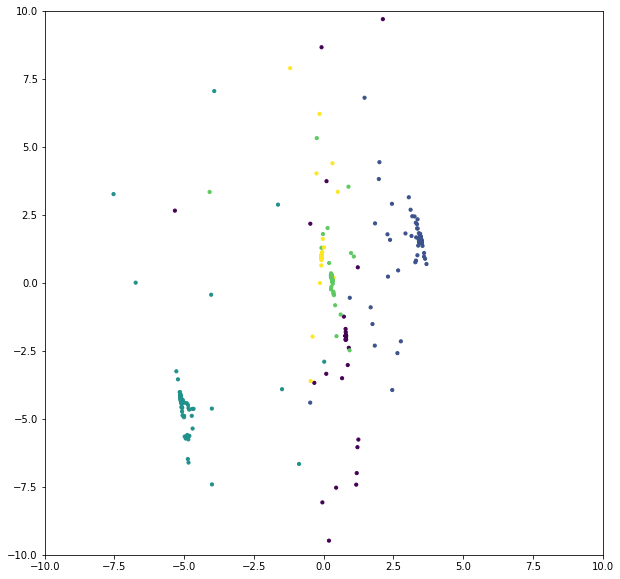

In [11]:
plt.scatter(np.array(slopVec),np.array(intVec),s=10,c=np.array(network))
plt.axis([-10,10,-10,10])
plt.show()